![](http://media.moddb.com/images/articles/1/205/204391/game_of_thrones_logo_icons.jpg)


# Exploratory Analysis of the Battles of the War of Five Kings Dataset

- Author: Chris Albon (@ChrisAlbon)
- Date: August 17, 2014
- Repo: https://github.com/chrisalbon/war_of_the_five_kings_dataset/

## Preliminary

In [16]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

# Set Jupyter Notebook's max row display to 1000
pd.set_option('display.max_rows',1000)

# Set Jupyter Notebook's max column width to 50
pd.set_option('display.max_colwidth',50)

## Loading the data

In [116]:
# Load the dataset
data_df = pd.read_csv('5kings_battles_v1.csv', index_col='battle_number')
print(data_df.shape)
data_df.head()

(38, 24)


,name,year,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
battle_number,,,,,,,,,,,,,,,,,,,,,
1,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
2,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
3,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
4,Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
5,Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


## Quick check on the data

In [117]:
# View the top five observations
data_df.head()

,name,year,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
battle_number,,,,,,,,,,,,,,,,,,,,,
1,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
2,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
3,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
4,Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
5,Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [118]:
# View the bottom five observations
data_df.tail()

,name,year,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
battle_number,,,,,,,,,,,,,,,,,,,,,
34,Second Seige of Storm's End,300,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,NaN,...,0.0,0.0,NaN,200.0,"Mace Tyrell, Mathis Rowan",Gilbert Farring,0.0,Storm's End,The Stormlands,NaN
35,Siege of Dragonstone,300,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,NaN,...,0.0,0.0,2000.0,NaN,"Loras Tyrell, Raxter Redwyne",Rolland Storm,0.0,Dragonstone,The Stormlands,NaN
36,Siege of Riverrun,300,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Frey,NaN,NaN,Tully,NaN,...,0.0,0.0,3000.0,NaN,"Daven Lannister, Ryman Fey, Jaime Lannister",Brynden Tully,0.0,Riverrun,The Riverlands,NaN
37,Siege of Raventree,300,Joffrey/Tommen Baratheon,Robb Stark,Bracken,Lannister,NaN,NaN,Blackwood,NaN,...,0.0,1.0,1500.0,NaN,"Jonos Bracken, Jaime Lannister",Tytos Blackwood,0.0,Raventree,The Riverlands,NaN
38,Siege of Winterfell,300,Stannis Baratheon,Joffrey/Tommen Baratheon,Baratheon,Karstark,Mormont,Glover,Bolton,Frey,...,NaN,NaN,5000.0,8000.0,Stannis Baratheon,Roose Bolton,0.0,Winterfell,The North,NaN


## Map of Westeros
![](http://www.slate.com/content/dam/slate/articles/news_and_politics/the_slate_quiz/authorPortraits/Game_of_Thrones_Westeros_Google_Maps.jpg)

## Exploratory Data Analysis

### Which year had the most battles?

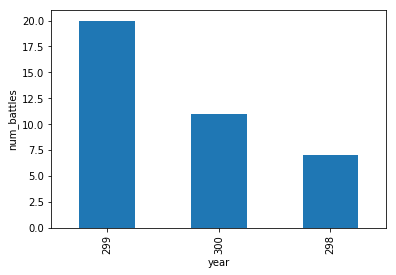

In [119]:
# Count the number of observations for each value, then make a bar plot
data_df.year.value_counts().plot(kind='bar')
plt.xlabel('year')
plt.ylabel('num_battles')
plt.show()

### Which region had the most battles?

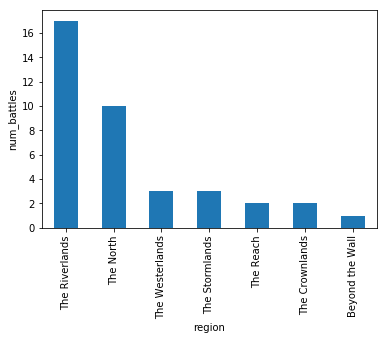

In [120]:
# Count the number of observations for each value, then make a bar plot
data_df.region.value_counts().plot(kind='bar')
plt.xlabel('region')
plt.ylabel('num_battles')
plt.show()

### What was the outcomes of all battles?

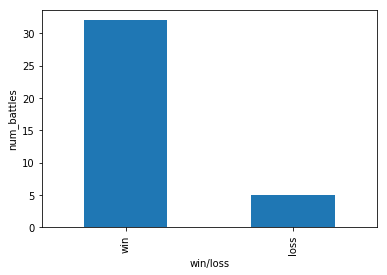

In [121]:
# Count the number of observations for each value, then make a bar plot
data_df.attacker_outcome.value_counts().plot(kind='bar')
plt.xlabel('win/loss')
plt.ylabel('num_battles')
plt.show()

### How common was the different types of battles?

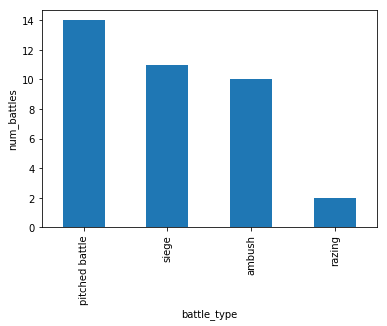

In [122]:
# Count the number of observations for each value, then make a bar plot
data_df.battle_type.value_counts().plot(kind='bar')
plt.xlabel('battle_type')
plt.ylabel('num_battles')
plt.show()

### Which king attacked the most?

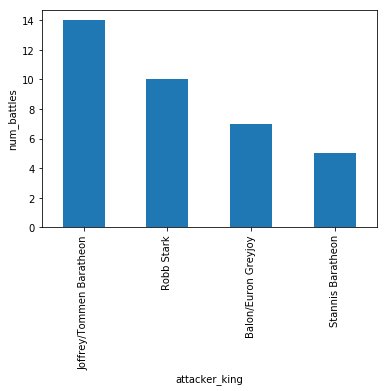

In [123]:
# Count the number of observations a king attacked another for each king, then make a bar plot
data_df.attacker_king.value_counts().plot(kind='bar')
plt.xlabel('attacker_king')
plt.ylabel('num_battles')
plt.show()

### Which king was the most attacked?

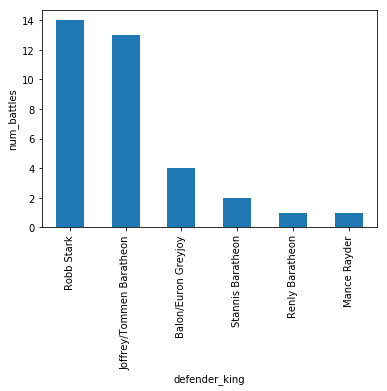

In [124]:
# Count the number of times a king was attacked for each king, then make a bar plot
data_df.defender_king.value_counts().plot(kind='bar')
plt.xlabel('defender_king')
plt.ylabel('num_battles')
plt.show()

### Which kings were most active in the war?

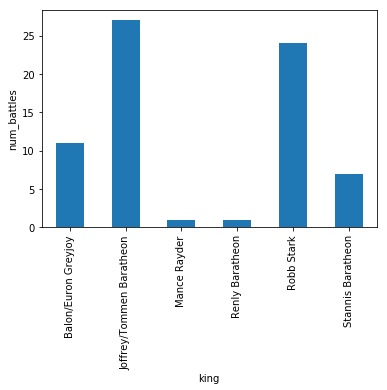

In [125]:
# Count the number of battles in which a king was active for each king, then make a bar plot
act_kings = data_df['attacker_king'].value_counts()+data_df['defender_king'].value_counts()
act_kings['Mance Rayder'] = 1.0
act_kings['Renly Baratheon'] = 1.0
act_kings.plot(kind='bar')
plt.xlabel('king')
plt.ylabel('num_battles')
plt.show()

### Is there any relationship between troop size and battle outcome?

In [160]:
# Create a ggplot scatter plot of attacker_size against defender_size (if not NaN), 
# with the color of each dot being determined by the outcome of the battle
data_df['color'] = data_df['attacker_outcome'].map({'win':1, 'loss':0})
data_df

,name,year,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note,color
battle_number,,,,,,,,,,,,,,,,,,,,,
1,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN,1.0
2,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,...,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN,1.0
3,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN,1.0
4,Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,...,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN,0.0
5,Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,...,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN,1.0
6,Battle of the Camps,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,...,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN,1.0
7,Sack of Darry,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,NaN,...,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN,1.0
8,Battle of Moat Cailin,299,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,...,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN,1.0
9,Battle of Deepwood Motte,299,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,...,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN,1.0


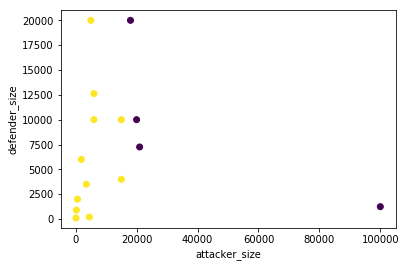

In [168]:
plt.scatter('attacker_size', 'defender_size', c='color', data=data_df)
plt.xlabel('attacker_size')
plt.ylabel('defender_size')
plt.show()

In [153]:
color_pd = data_df[['attacker_size', 'defender_size']].dropna()
color_pd

,attacker_size,defender_size
battle_number,,
1,15000.0,4000.0
3,15000.0,10000.0
4,18000.0,20000.0
5,1875.0,6000.0
6,6000.0,12625.0
11,244.0,900.0
14,618.0,2000.0
15,6000.0,10000.0
16,5000.0,20000.0
